In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
# improt the necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import sklearn
from sklearn.model_selection import train_test_split
import seaborn as sns
import plotly.express as px
import statistics
from scipy import stats
from tabulate import tabulate

import warnings
warnings.filterwarnings('ignore')

##Data Understanding & Exploration

In [3]:
def explore_dataset(data, data_filename=None):
    """
    In explore_dataset function we are doing all the things that given below:
    - checking shape of dataset
    - checking column names that exist in dataset
    - checking null values 
    - checking overall information about dataset using info() method
    - checking dtypes of columns
    """
    print("="*100)
    print("\t\t\tEDA Dataset: {}".format(data_filename))
    print("="*100)
    
    print("Total Rows: {}".format(data.shape[0]))
    print("\nTotal Columns: {}".format(data.shape[1]))
    print("\nColumns: {}".format(data.columns.tolist()))
    print("\nTotal Null Values: {}".format(data.isnull().sum().sum()))
    print(" ")
    print("\t\tOverall Information about Dataset\n")
    print(data.info())
    print(" ")
    print("\t\tDtype of all Columns\n")
    print(data.dtypes)
    # check the distributin of labels in dataset
    df['DEATH_EVENT'].value_counts().plot(kind='pie', figsize=(15,6),autopct='%1.0f%%',textprops={'fontsize': 14})
    plt.title("Death Event in Dataset", fontsize=18)
    plt.show()

In [4]:
dataset_file1 = '/content/drive/MyDrive/Colab Notebooks/dataset/heart_failure_clinical_records_dataset.csv'
df = pd.read_csv(dataset_file1)
#df = pd.read_csv ('C:/Users/Igor/Desktop/work/Office/Contracts/appletreelee/New1/heart_failure_clinical_records_dataset.csv')
#df = pd.read_csv ('C:/Users/Igor/Desktop/Office/Contracts/appletreelee/New1/heart_failure_clinical_records_dataset.csv')
df.describe()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
count,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.00000,299.000000,299.000000,299.00000,299.000000,299.00000
mean,60.833893,0.431438,581.839465,0.418060,38.083612,0.351171,263358.029264,1.39388,136.625418,0.648829,0.32107,130.260870,0.32107
std,11.894809,0.496107,970.287881,0.494067,11.834841,0.478136,97804.236869,1.03451,4.412477,0.478136,0.46767,77.614208,0.46767
min,40.000000,0.000000,23.000000,0.000000,14.000000,0.000000,25100.000000,0.50000,113.000000,0.000000,0.00000,4.000000,0.00000
25%,51.000000,0.000000,116.500000,0.000000,30.000000,0.000000,212500.000000,0.90000,134.000000,0.000000,0.00000,73.000000,0.00000
50%,60.000000,0.000000,250.000000,0.000000,38.000000,0.000000,262000.000000,1.10000,137.000000,1.000000,0.00000,115.000000,0.00000
75%,70.000000,1.000000,582.000000,1.000000,45.000000,1.000000,303500.000000,1.40000,140.000000,1.000000,1.00000,203.000000,1.00000
max,95.000000,1.000000,7861.000000,1.000000,80.000000,1.000000,850000.000000,9.40000,148.000000,1.000000,1.00000,285.000000,1.00000


			EDA Dataset: None
Total Rows: 299

Total Columns: 13

Columns: ['age', 'anaemia', 'creatinine_phosphokinase', 'diabetes', 'ejection_fraction', 'high_blood_pressure', 'platelets', 'serum_creatinine', 'serum_sodium', 'sex', 'smoking', 'time', 'DEATH_EVENT']

Total Null Values: 0
 
		Overall Information about Dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   age                       299 non-null    float64
 1   anaemia                   299 non-null    int64  
 2   creatinine_phosphokinase  299 non-null    int64  
 3   diabetes                  299 non-null    int64  
 4   ejection_fraction         299 non-null    int64  
 5   high_blood_pressure       299 non-null    int64  
 6   platelets                 299 non-null    float64
 7   serum_creatinine          299 non-null    float64
 8   serum_sodium        

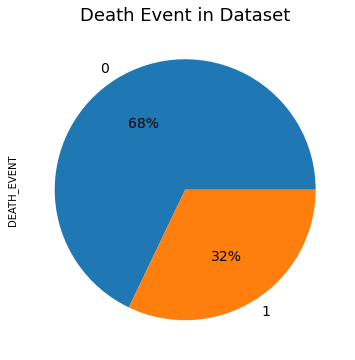

In [5]:
# check the information of dataset
explore_dataset(df)

###Categorical Columns

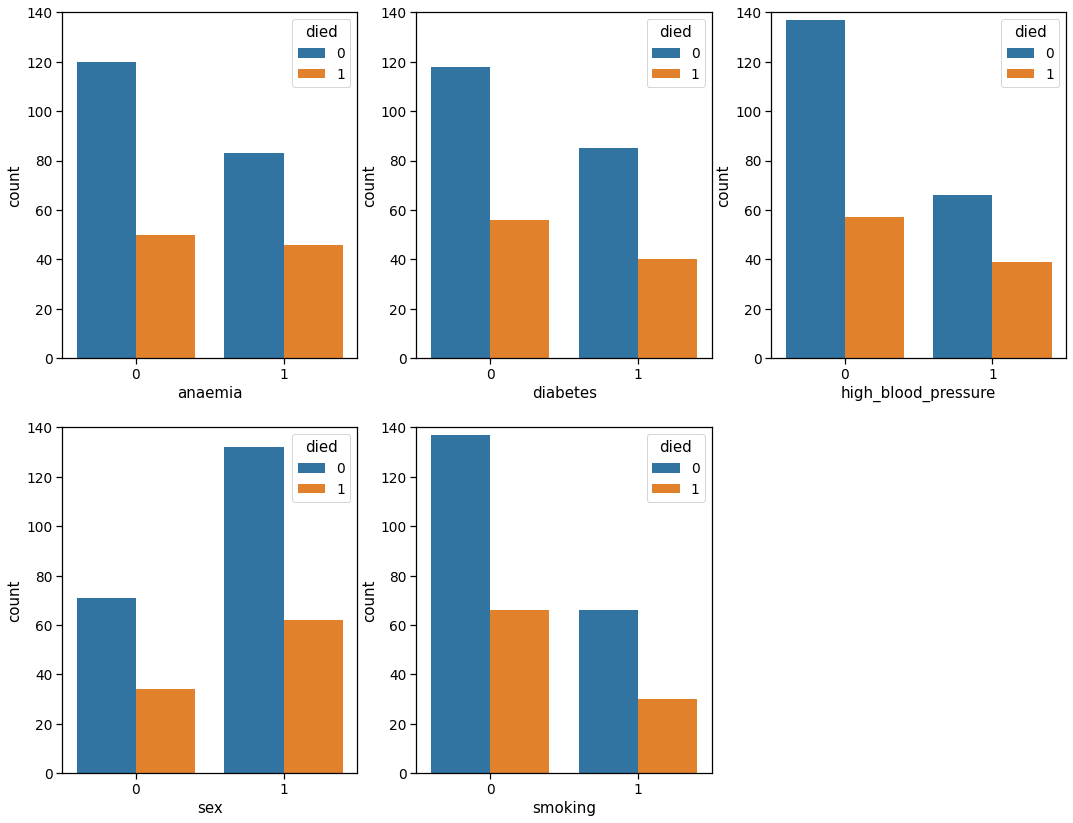

In [6]:
df = df.rename(columns={"DEATH_EVENT": "died"})
categorical_cols = df.loc(axis=1)['anaemia','diabetes','high_blood_pressure','sex','smoking','died']
numerical_cols = df.loc(axis=1)['age','creatinine_phosphokinase','ejection_fraction','platelets','serum_creatinine','serum_sodium','time']
sns.set_context("notebook", font_scale=1.25)

fig, ax = plt.subplots(2,3, figsize=(18,14))
[sns.countplot(data=df, x=cat, hue="died", ax=ax.flatten()[i]) 
 for i,cat in enumerate(categorical_cols.drop('died',axis=1))]
ax.flatten()[-1].set_visible(False) # Remove the 6th empty plot
[y_ax.set_ylim(0,140) for y_ax in ax.flatten()]
plt.show()

###Numerical columns

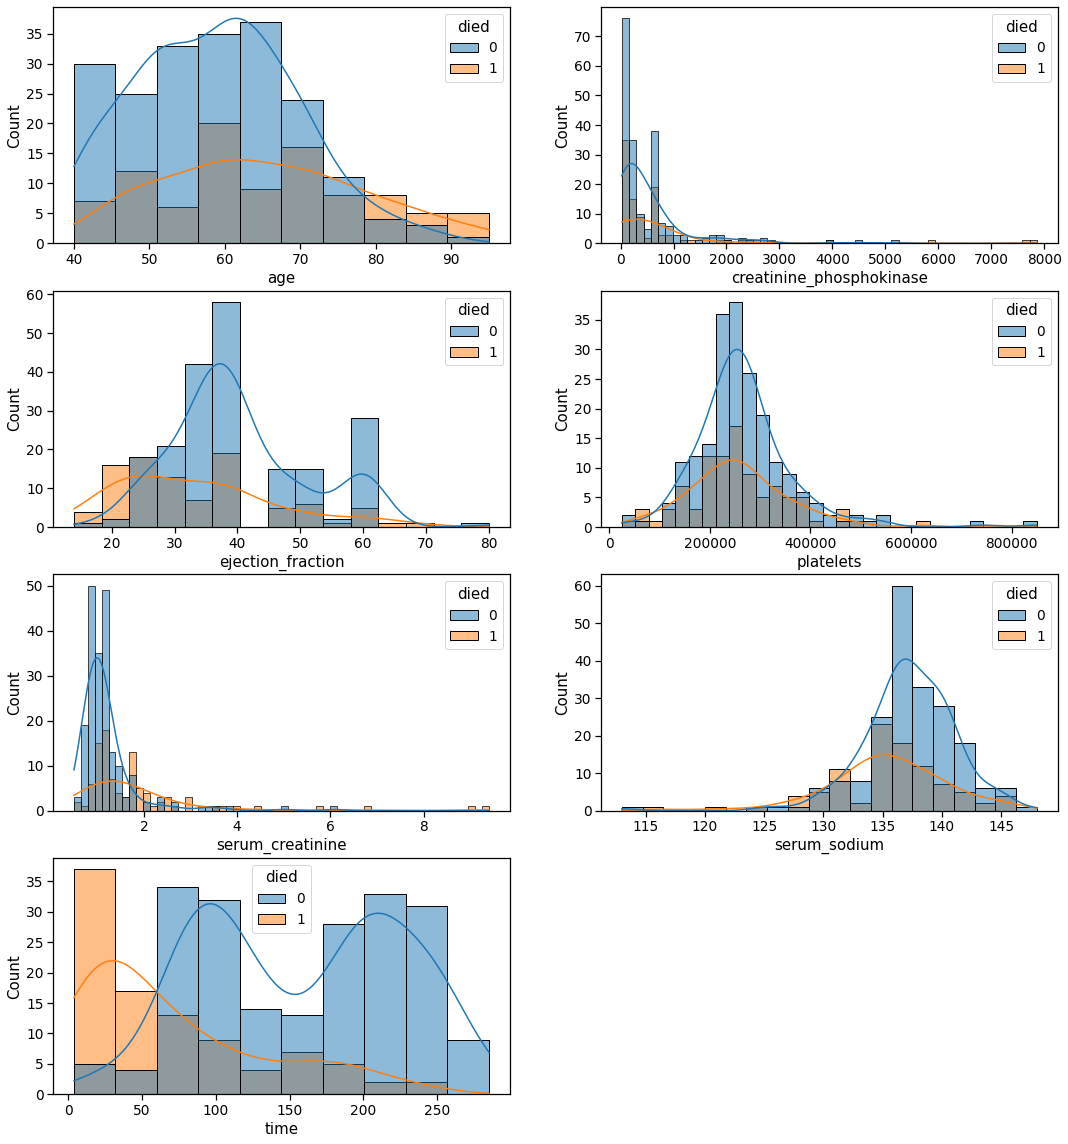

In [7]:
fig, ax = plt.subplots(nrows=4, ncols=2, figsize=(18,20))
[sns.histplot(data=df, x=num, hue="died", kde=True, ax=ax.flatten()[i]) for i,num in enumerate(numerical_cols)]
ax.flatten()[-1].set_visible(False)
plt.show()

##Censored Data
Plot a histogram of the survival times to see in general how long cases survived before censorship or events.

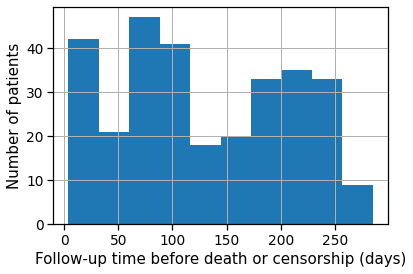

In [8]:
df.time.hist();
plt.xlabel("Follow-up time before death or censorship (days)");
plt.ylabel("Number of patients");

Distribution for censored and uncensored patients

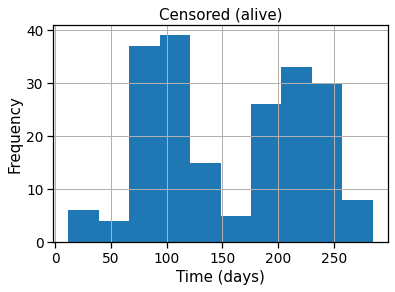

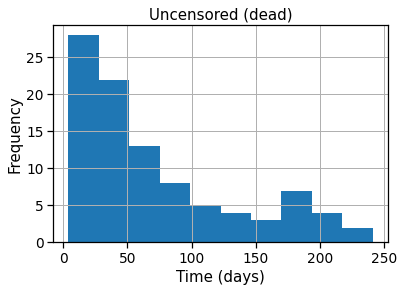

In [9]:
df = df.rename(columns={"died": "DEATH_EVENT"})
df_censored = df[df.DEATH_EVENT == 0]
df_uncensored = df[df.DEATH_EVENT == 1]

df_censored.time.hist()
plt.title("Censored (alive)")
plt.xlabel("Time (days)")
plt.ylabel("Frequency")
plt.show()

df_uncensored.time.hist()
plt.title("Uncensored (dead)")
plt.xlabel("Time (days)")
plt.ylabel("Frequency")
plt.show()

In [10]:
!pip install lifelines

from lifelines import CoxPHFitter
from lifelines.utils import concordance_index as cindex

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 349 kB 13.8 MB/s 
     |████████████████████████████████| 68 kB 5.9 MB/s 
  Created wheel for autograd-gamma: filename=autograd_gamma-0.5.0-py3-none-any.whl size=4048 sha256=b91174a71c24c874b320deef51aa2654f84b8b2d203cb51e7eda2f85cf1b5ab6
  Stored in directory: /root/.cache/pip/wheels/9f/01/ee/1331593abb5725ff7d8c1333aee93a50a1c29d6ddda9665c9f
Successfully built autograd-gamma


In [11]:
# check correlations of variables first
df.corr()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
age,1.000000,0.088006,-0.081584,-0.101012,0.060098,0.093289,-0.052354,0.159187,-0.045966,0.065430,0.018668,-0.224068,0.253729
anaemia,0.088006,1.000000,-0.190741,-0.012729,0.031557,0.038182,-0.043786,0.052174,0.041882,-0.094769,-0.107290,-0.141414,0.066270
creatinine_phosphokinase,-0.081584,-0.190741,1.000000,-0.009639,-0.044080,-0.070590,0.024463,-0.016408,0.059550,0.079791,0.002421,-0.009346,0.062728
diabetes,-0.101012,-0.012729,-0.009639,1.000000,-0.004850,-0.012732,0.092193,-0.046975,-0.089551,-0.157730,-0.147173,0.033726,-0.001943
ejection_fraction,0.060098,0.031557,-0.044080,-0.004850,1.000000,0.024445,0.072177,-0.011302,0.175902,-0.148386,-0.067315,0.041729,-0.268603
high_blood_pressure,0.093289,0.038182,-0.070590,-0.012732,0.024445,1.000000,0.049963,-0.004935,0.037109,-0.104615,-0.055711,-0.196439,0.079351
platelets,-0.052354,-0.043786,0.024463,0.092193,0.072177,0.049963,1.000000,-0.041198,0.062125,-0.125120,0.028234,0.010514,-0.049139
serum_creatinine,0.159187,0.052174,-0.016408,-0.046975,-0.011302,-0.004935,-0.041198,1.000000,-0.189095,0.006970,-0.027414,-0.149315,0.294278
serum_sodium,-0.045966,0.041882,0.059550,-0.089551,0.175902,0.037109,0.062125,-0.189095,1.000000,-0.027566,0.004813,0.087640,-0.195204
sex,0.065430,-0.094769,0.079791,-0.157730,-0.148386,-0.104615,-0.125120,0.006970,-0.027566,1.000000,0.445892,-0.015608,-0.004316


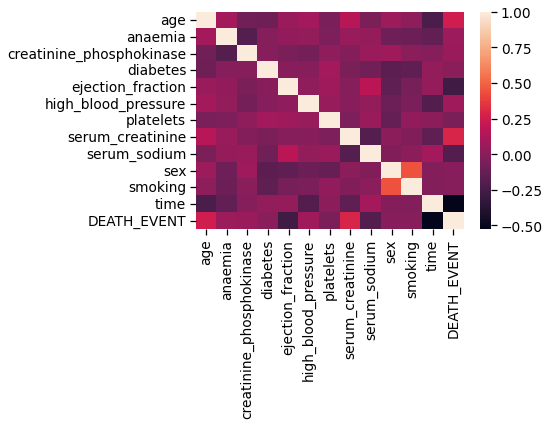

In [12]:
import seaborn as sns
corr = df.corr()
sns.heatmap(corr, 
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values)

In [13]:
# none of the correlations look too bad

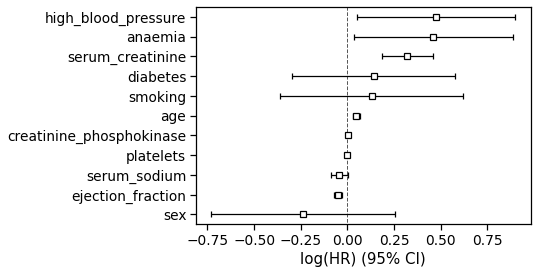

In [14]:
# try a cox regression model
cph = CoxPHFitter()
cph.fit(df, duration_col='time', event_col='DEATH_EVENT')
cph.plot()

The ``p_value_threshold`` is set at 0.05. Even under the null hypothesis of no violations, some
covariates will be below the threshold by chance. This is compounded when there are many covariates.
Similarly, when there are lots of observations, even minor deviances from the proportional hazard
assumption will be flagged.

With that in mind, it's best to use a combination of statistical tests and visual tests to determine
the most serious violations. Produce visual plots using ``check_assumptions(..., show_plots=True)``
and looking for non-constant lines. See link [A] below for a full example.



<lifelines.StatisticalResult: proportional_hazard_test>
 null_distribution = chi squared
degrees_of_freedom = 1
             model = <lifelines.CoxPHFitter: fitted with 299 total observations, 203 right-censored observations>
         test_name = proportional_hazard_test

---
                               test_statistic    p  -log2(p)
age                      km              0.11 0.74      0.43
                         rank            0.03 0.86      0.21
anaemia                  km              0.00 1.00      0.00
                         rank            0.01 0.93      0.11
creatinine_phosphokinase km              1.13 0.29      1.79
                         rank            1.11 0.29      1.77
diabetes                 km              0.04 0.84      0.25
                         rank            0.00 0.99      0.02
ejection_fraction        km              5.85 0.02      6.00
                         rank            6.21 0.01      6.30
high_blood_pressure      km              0.11 0.74      0.44
                         rank            0.11 0.74      0.44
platelets                km              0.04 0.85      0.24
                         rank            0.11 0.74      0.44
serum_creatinine         km              3.22 0.07      3.78
                         rank            3.48 0.06      4.00
serum_sodium             km              1.10 0.29      1.76
                         rank            1.73 0.19      2.41
sex                      km              0.09 0.76      0.39
                         rank            0.26 0.61      0.71
smoking                  km              0.58 0.45      1.16
                         rank            0.33 0.57      0.82



1. Variable 'ejection_fraction' failed the non-proportional test: p-value is 0.0127.

   Advice 1: the functional form of the variable 'ejection_fraction' might be incorrect. That is,
there may be non-linear terms missing. The proportional hazard test used is very sensitive to
incorrect functional forms. See documentation in link [D] below on how to specify a functional form.

   Advice 2: try binning the variable 'ejection_fraction' using pd.cut, and then specify it in
`strata=['ejection_fraction', ...]` in the call in `.fit`. See documentation in link [B] below.

   Advice 3: try adding an interaction term with your time variable. See documentation in link [C]
below.


   Bootstrapping lowess lines. May take a moment...


---
[A]  https://lifelines.readthedocs.io/en/latest/jupyter_notebooks/Proportional%20hazard%20assumption.html
[B]  https://lifelines.readthedocs.io/en/latest/jupyter_notebooks/Proportional%20hazard%20assumption.html#Bin-variable-and-stratify-on-it
[C]  https://lif

[[<matplotlib.axes._subplots.AxesSubplot at 0x7f8864aa2510>,

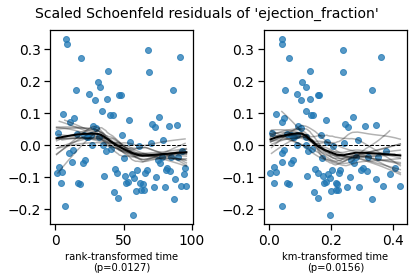

In [15]:
# A check of assumptions for the Cox model
# more details are here: https://lifelines.readthedocs.io/en/latest/jupyter_notebooks/Proportional%20hazard%20assumption.html
# Finding: Variable 'ejection_fraction' failed the non-proportional test: p-value is 0.0127.
# Consider non-linear terms for ejection_fraction

cph.check_assumptions(df, p_value_threshold=0.05, show_plots=True)

In [16]:
# refit witn the spline method recommended in https://lifelines.readthedocs.io/en/latest/jupyter_notebooks/Proportional%20hazard%20assumption.html
# now it passes

cph.fit(df, duration_col='time', event_col='DEATH_EVENT', formula="bs(ejection_fraction, df=3, lower_bound=10, upper_bound=100) + age + anaemia + creatinine_phosphokinase + diabetes + high_blood_pressure + platelets + serum_creatinine + serum_sodium + sex + smoking")
sumry = cph.print_summary(model="spline_model"); print()
cph.check_assumptions(df, show_plots=True, p_value_threshold=0.05)

<lifelines.CoxPHFitter: fitted with 299 total observations, 203 right-censored observations>
             duration col = 'time'
                event col = 'DEATH_EVENT'
      baseline estimation = breslow
   number of observations = 299
number of events observed = 96
   partial log-likelihood = -461.70
         time fit was run = 2022-08-08 03:36:34 UTC
                    model = spline_model

---
                                                                  coef  exp(coef)   se(coef)   coef lower 95%   coef upper 95%  exp(coef) lower 95%  exp(coef) upper 95%
covariate                                                                                                                                                               
age                                                               0.05       1.05       0.01             0.03             0.07                 1.03                 1.07
anaemia                                                           0.49       1.64       0.22             0.06             0.93                 1.06                 2.52
bs(ejection_fraction, df=3, lower_bound=10, upper_bound=100)[1] -10.59       0.00       3.20           -16.85            -4.32                 0.00                 0.01
bs(ejection_fraction, df=3, lower_bound=10, upper_bound=100)[2]   4.85     127.12       4.86            -4.69            14.38                 0.01             1.76e+06
bs(ejection_fraction, df=3, lower_bound=10, upper_bound=100)[3] -16.65       0.00       9.70           -35.66             2.36                 0.00                10.64
creatinine_phosphokinase                                          0.00       1.00       0.00             0.00             0.00                 1.00                 1.00
diabetes                                                          0.13       1.14       0.23            -0.31             0.58                 0.74                 1.78
high_blood_pressure                                               0.36       1.43       0.22            -0.07             0.79                 0.93                 2.20
platelets                                                        -0.00       1.00       0.00            -0.00             0.00                 1.00                 1.00
serum_creatinine                                                  0.30       1.35       0.08             0.13             0.46                 1.14                 1.58
serum_sodium                                                     -0.04       0.96       0.02            -0.09             0.00                 0.92                 1.00
sex                                                              -0.27       0.76       0.26            -0.78             0.23                 0.46                 1.26
smoking                                                           0.15       1.16       0.26            -0.36             0.65                 0.70                 1.92

                                                                  cmp to     z      p   -log2(p)
covariate                                                                                       
age                                                                 0.00  5.10 <0.005      21.49
anaemia                                                             0.00  2.23   0.03       5.27
bs(ejection_fraction, df=3, lower_bound=10, upper_bound=100)[1]     0.00 -3.31 <0.005      10.07
bs(ejection_fraction, df=3, lower_bound=10, upper_bound=100)[2]     0.00  1.00   0.32       1.65
bs(ejection_fraction, df=3, lower_bound=10, upper_bound=100)[3]     0.00 -1.72   0.09       3.54
creatinine_phosphokinase                                            0.00  2.69   0.01       7.13
diabetes                                                            0.00  0.60   0.55       0.86
high_blood_pressure                                                 0.00  1.63   0.10       3.28
platelets                                                           0.00 -0.43   0.66      


Proportional hazard assumption looks okay.


[]

In [17]:
results = cph.summary
results.rename(index={
    'bs(ejection_fraction, df=3, lower_bound=10, upper_bound=100)[1]':'linear polynomial',
    'bs(ejection_fraction, df=3, lower_bound=10, upper_bound=100)[2]':'quadratic polynomial',
    'bs(ejection_fraction, df=3, lower_bound=10, upper_bound=100)[3]':'cubic polynomial',
}).round(2)

,coef,exp(coef),se(coef),coef lower 95%,coef upper 95%,exp(coef) lower 95%,exp(coef) upper 95%,cmp to,z,p,-log2(p)
covariate,,,,,,,,,,,
age,0.05,1.05,0.01,0.03,0.07,1.03,1.07,0.0,5.10,0.00,21.49
anaemia,0.49,1.64,0.22,0.06,0.93,1.06,2.52,0.0,2.23,0.03,5.27
linear polynomial,-10.59,0.00,3.20,-16.85,-4.32,0.00,0.01,0.0,-3.31,0.00,10.07
quadratic polynomial,4.85,127.12,4.86,-4.69,14.38,0.01,1757699.89,0.0,1.00,0.32,1.65
cubic polynomial,-16.65,0.00,9.70,-35.66,2.36,0.00,10.64,0.0,-1.72,0.09,3.54
creatinine_phosphokinase,0.00,1.00,0.00,0.00,0.00,1.00,1.00,0.0,2.69,0.01,7.13
diabetes,0.13,1.14,0.23,-0.31,0.58,0.74,1.78,0.0,0.60,0.55,0.86
high_blood_pressure,0.36,1.43,0.22,-0.07,0.79,0.93,2.20,0.0,1.63,0.10,3.28
platelets,-0.00,1.00,0.00,-0.00,0.00,1.00,1.00,0.0,-0.43,0.66,0.59


In [18]:
cph.print_summary(columns=["coef","exp(coef)","exp(coef) lower 95%","exp(coef) upper 95%", "z", "p"], decimals=3)

<lifelines.CoxPHFitter: fitted with 299 total observations, 203 right-censored observations>
             duration col = 'time'
                event col = 'DEATH_EVENT'
      baseline estimation = breslow
   number of observations = 299
number of events observed = 96
   partial log-likelihood = -461.701
         time fit was run = 2022-08-08 03:36:34 UTC

---
                                                                   coef  exp(coef)  exp(coef) lower 95%  exp(coef) upper 95%      z       p
covariate                                                                                                                                  
age                                                               0.049      1.050                1.030                1.070  5.100 <0.0005
anaemia                                                           0.492      1.636                1.061                2.523  2.228   0.026
bs(ejection_fraction, df=3, lower_bound=10, upper_bound=100)[1] -10.585      0.000                0.000                0.013 -3.311   0.001
bs(ejection_fraction, df=3, lower_bound=10, upper_bound=100)[2]   4.845    127.116                0.009            1.758e+06  0.996   0.319
bs(ejection_fraction, df=3, lower_bound=10, upper_bound=100)[3] -16.647      0.000                0.000               10.643 -1.716   0.086
creatinine_phosphokinase                                          0.000      1.000                1.000                1.000  2.689   0.007
diabetes                                                          0.134      1.144                0.736                1.778  0.597   0.550
high_blood_pressure                                               0.357      1.429                0.930                2.195  1.631   0.103
platelets                                                        -0.000      1.000                1.000                1.000 -0.435   0.664
serum_creatinine                                                  0.297      1.346                1.143                1.585  3.562 <0.0005
serum_sodium                                                     -0.042      0.959                0.916                1.005 -1.759   0.079
sex                                                              -0.274      0.761                0.458                1.264 -1.055   0.291
smoking                                                           0.148      1.159                0.699                1.922  0.573   0.567
---
Concordance = 0.766
Partial AIC = 949.402
log-likelihood ratio test = 95.008 on 13 df
-log2(p) of ll-ratio test = 45.895

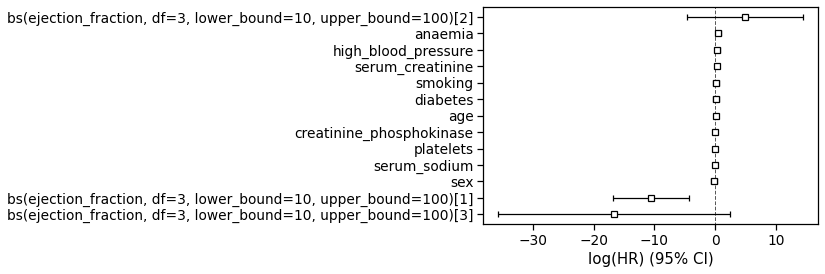

In [19]:
cph.plot()

We can compare the predicted risk curves for any variable such as smoking.

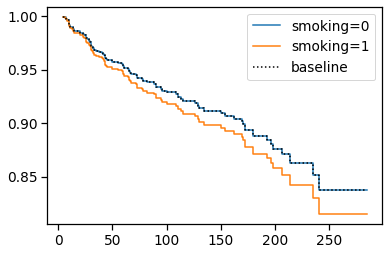

In [20]:
cph.plot_partial_effects_on_outcome('smoking', values=[0, 1]);

We see that the group with smoking has a lower survival rate at all times (the x-axis is time) compared to the smoking group.

In [21]:
!pip install lifelines
from lifelines import KaplanMeierFitter, CoxPHFitter
from lifelines.statistics import logrank_test

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


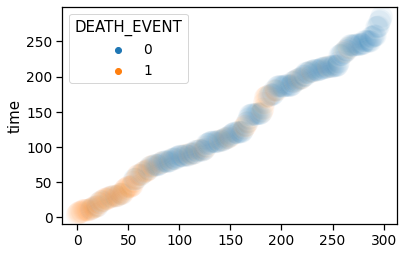

In [22]:
sns.scatterplot(x=df.index,y=df.time,hue=df.DEATH_EVENT,alpha=.05,s=500)
plt.show()

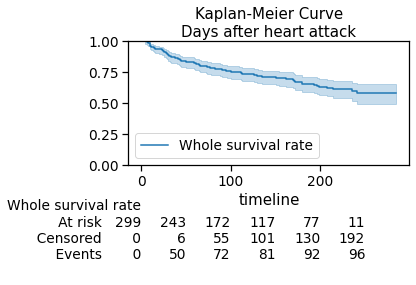

In [23]:
#Kaplan Meier Curve
# From the lifelines library, the KaplanMeierFitter is needed for this exercise:
kmf = KaplanMeierFitter()
# For plot
ax = plt.subplot(111)
# Duration of observations
X = df.time
# Death events
Y = df.DEATH_EVENT
# We next use the KaplanMeierFitter method fit() to fit the model to the data. 
kmf.fit(X, event_observed = Y, label = 'Whole survival rate')
# The property is a Pandas DataFrame, so we can call plot() on it:
kmf.plot(ax = ax,at_risk_counts=True)
plt.title("Kaplan-Meier Curve")
plt.xlabel("Days after heart attack")
plt.ylabel("Survival")
plt.ylim([0,1])
plt.show()

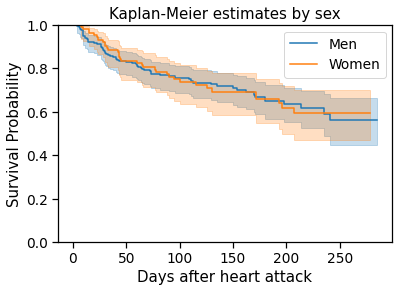

In [24]:
ax = plt.subplot(111)
X = df[df.sex==1].time
Y = df[df.sex==1].DEATH_EVENT
kmf.fit(X, event_observed = Y, label = 'Men')
kmf.plot(ax = ax)
X = df[df.sex==0].time
Y = df[df.sex==0].DEATH_EVENT
kmf.fit(X, event_observed = Y, label = 'Women')
kmf.plot(ax = ax)
plt.title("Kaplan-Meier estimates by sex")
plt.xlabel("Days after heart attack")
plt.ylabel("Survival Probability")
plt.ylim([0,1])
plt.show()

###Ahmad et al., (2017) original manuscript
Survival analysis of heart failure patients: A case study
#####EF was divided into three levels (i.e. EF<=30, 30<EF<=45 and EF>45).



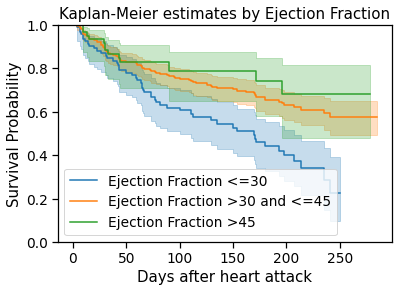

In [25]:
ax = plt.subplot(111)
X = df[df.ejection_fraction<=30].time
Y = df[df.ejection_fraction<=30].DEATH_EVENT
kmf.fit(X, event_observed = Y, label = 'Ejection Fraction <=30')
kmf.plot(ax = ax)

X = df[(df.ejection_fraction>30)|(df.ejection_fraction<=45)].time
Y = df[(df.ejection_fraction>30)|(df.ejection_fraction<=45)].DEATH_EVENT
kmf.fit(X, event_observed = Y, label = 'Ejection Fraction >30 and <=45')
kmf.plot(ax = ax)

X = df[df.ejection_fraction>45].time
Y = df[df.ejection_fraction>45].DEATH_EVENT
kmf.fit(X, event_observed = Y, label = 'Ejection Fraction >45')
kmf.plot(ax = ax)

plt.title("Kaplan-Meier estimates by Ejection Fraction")
plt.xlabel("Days after heart attack")
plt.ylabel("Survival Probability")
plt.ylim([0,1])
plt.show()


###Comparing:
A normal heart's ejection fraction is between 50 and 70 percent accoridng to American Heart Association. A borderline ejection fraction can range between 41% and 50% (i.e. EF<=41, 41<EF<=50 and EF>50) for comparison.

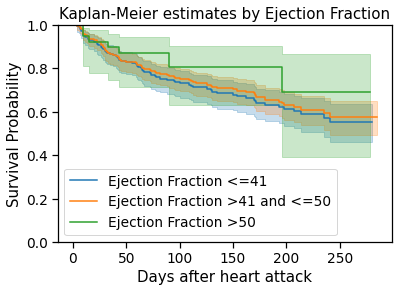

In [26]:
ax = plt.subplot(111)
X = df[df.ejection_fraction<=41].time
Y = df[df.ejection_fraction<=41].DEATH_EVENT
kmf.fit(X, event_observed = Y, label = 'Ejection Fraction <=41')
kmf.plot(ax = ax)

X = df[(df.ejection_fraction>41)|(df.ejection_fraction<=50)].time
Y = df[(df.ejection_fraction>41)|(df.ejection_fraction<=50)].DEATH_EVENT
kmf.fit(X, event_observed = Y, label = 'Ejection Fraction >41 and <=50')
kmf.plot(ax = ax)

X = df[df.ejection_fraction>50].time
Y = df[df.ejection_fraction>50].DEATH_EVENT
kmf.fit(X, event_observed = Y, label = 'Ejection Fraction >50')
kmf.plot(ax = ax)

plt.title("Kaplan-Meier estimates by Ejection Fraction")
plt.xlabel("Days after heart attack")
plt.ylabel("Survival Probability")
plt.ylim([0,1])
plt.show()

In [27]:
ht_dm = []
for i in range(len(df)):
    if df.diabetes.iloc[i] == 0 and df.high_blood_pressure.iloc[i] == 0:
        ht_dm.append("Healthy")
    elif df.diabetes.iloc[i] == 1 and df.high_blood_pressure.iloc[i] == 0:
        ht_dm.append("Just Diabetic")
    elif df.diabetes.iloc[i] == 0 and df.high_blood_pressure.iloc[i] == 1:
        ht_dm.append("Just hypertensive")
    else:
        ht_dm.append("Combine patient")

        
df["Diabetic_and_HT"] = ht_dm
df.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT,Diabetic_and_HT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1,Just hypertensive
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1,Healthy
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1,Healthy
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1,Healthy
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1,Just Diabetic


In [28]:
from lifelines.statistics import logrank_test

T = df["time"]
E = df["DEATH_EVENT"]
partial =  df.high_blood_pressure==1
results = logrank_test(T[partial], T[~partial], E[partial], E[~partial], alpha=.99)

results.print_summary()

<lifelines.StatisticalResult: logrank_test>
               t_0 = -1
 null_distribution = chi squared
degrees_of_freedom = 1
             alpha = 0.99
         test_name = logrank_test

---
 test_statistic    p  -log2(p)
           4.41 0.04      4.80

-log2 > test_statistic means that
DEATH_EVENT is not only related to high blood pressure.

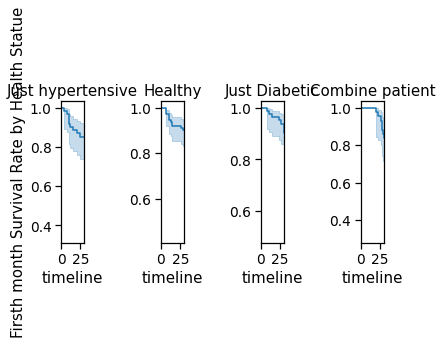

In [29]:
Diabetic_and_HT = df['Diabetic_and_HT'].unique()

for i, Diabetic_and_HT in enumerate(Diabetic_and_HT):
    ax = plt.subplot(1, 4, i + 1)

    ix = df['Diabetic_and_HT'] == Diabetic_and_HT
    kmf.fit(T[ix], E[ix], label=Diabetic_and_HT)
    kmf.plot_survival_function(ax=ax, legend=False)

    plt.title(Diabetic_and_HT)
    plt.xlim(0,30)

    if i==0:
        plt.ylabel('Firsth month Survival Rate by Health Statue')

plt.tight_layout()

###Survival Analysis using Kaplan-Meier plots
A function that will allow us to quickly plot Kaplan Meier curves for any feature.

In [30]:
df = df.rename(columns={"DEATH_EVENT": "died"})

In [31]:
def km_fits(data, hue=None, split_points=None):
    
    if hue in categorical_cols.columns:
        
        range_hue = np.unique(data[hue])
        
        X = [data[data[hue]==x]['time'] for x in range_hue]
        Y = [data[data[hue]==y]['died'] for y in range_hue]
        fit_label = [str(hue + ': ' + str(range_hue_i)) for range_hue_i in range_hue]
        
        
    elif hue in numerical_cols.columns:
        
        bins = pd.cut(x=data[hue],bins=split_points)
        range_hue = np.unique(bins)
        hue_group = str(hue) + "_group"
        data[hue_group] = pd.cut(x=data[hue], bins=split_points)
        
        X = [data[data[hue_group] == bin_range]['time'] for bin_range in range_hue]      
        Y = [data[data[hue_group] == bin_range]['died'] for bin_range in range_hue]        
        fit_label = [str(str(range_hue_i).replace(',',' -').replace(']',')')) for range_hue_i in range_hue]        
        data.drop(hue_group, axis=1, inplace=True)
        
    fits = [KaplanMeierFitter().fit(x_i, event_observed = y_i, label=fit_label[i]) for i,(x_i, y_i) in enumerate(zip(X,Y))]
    
    return fits

###Categorical Columns
Construct Kaplan-Meier curves for each of the categorical variables.

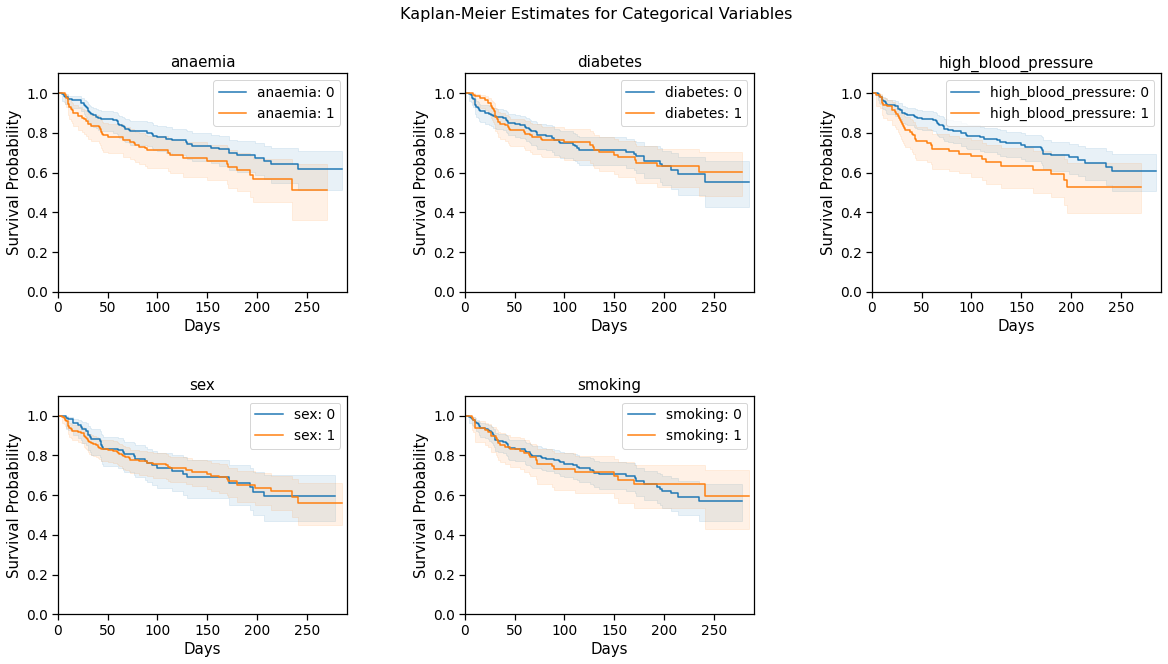

In [32]:
fig, ax = plt.subplots(nrows=2, ncols=3, figsize=(18,10))
plt.tight_layout(pad=5.0)

for i,feat in enumerate(categorical_cols.drop('died',axis=1).columns):
    cat_fits = km_fits(df, hue=feat)

    [x.plot(title=feat, ylabel="Survival Probability", xlabel="Days",
            ylim=(0,1.1), xlim=(0,290),
            ci_alpha=0.1, ax=ax.flatten()[i]) for x in cat_fits]

ax.flatten()[-1].set_visible(False)
fig.suptitle("Kaplan-Meier Estimates for Categorical Variables ", fontsize=16.0)
plt.show()

###Numerical Columns

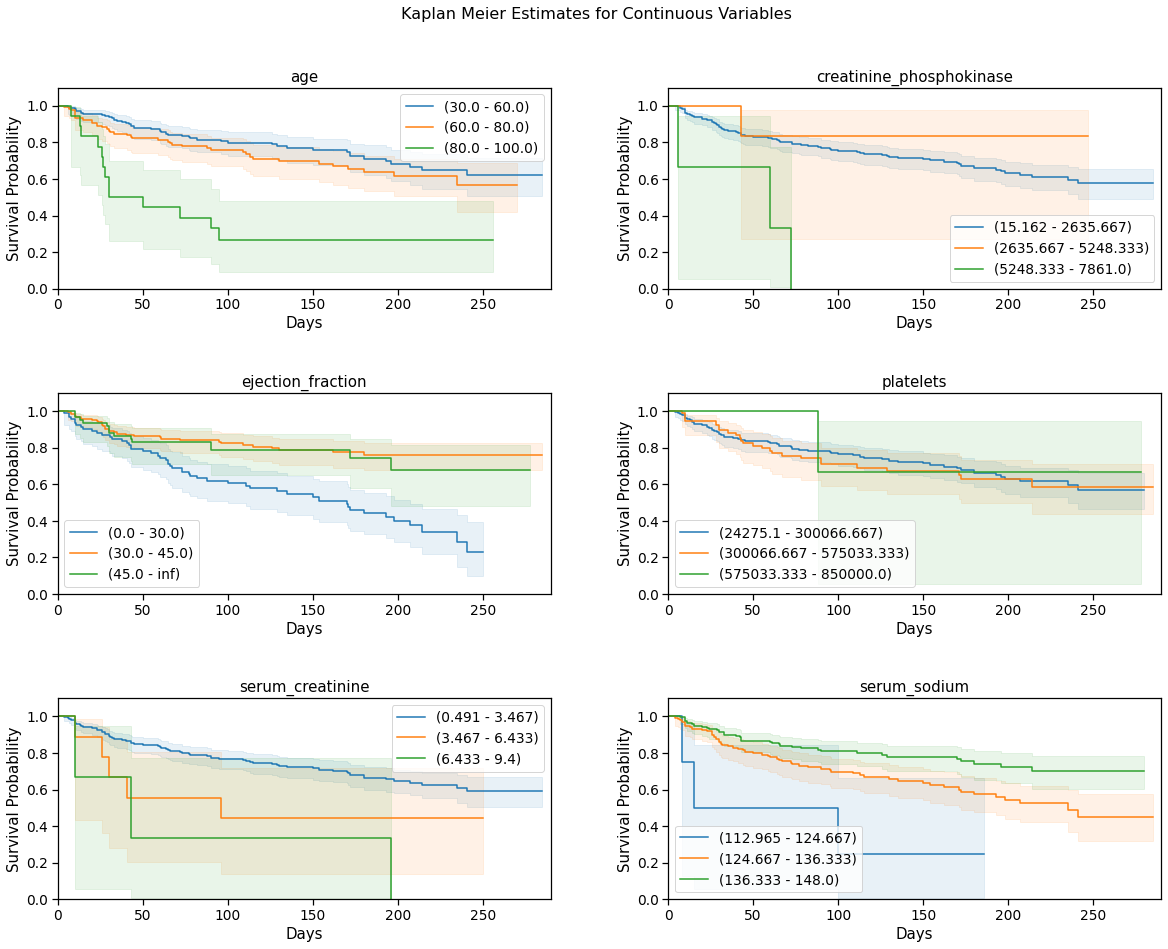

In [33]:
fig, ax = plt.subplots(nrows=4, ncols=2, figsize=(18,18))

plt.tight_layout(pad=5.0)

split_points = [[30.0,60.0,80.0,100.0],3,[0,30.0,45.0,np.inf],3,3,3,3]


for i,feat in enumerate(numerical_cols.drop('time',axis=1).columns):
    con_fits = km_fits(df, hue=feat,split_points=split_points[i])

    [x.plot(title=feat, ylabel="Survival Probability", xlabel="Days",
            ylim=(0,1.1), xlim=(0,290), ci_alpha=0.1, 
            ax=ax.flatten()[i]) for x in con_fits]

ax.flatten()[-1].set_visible(False)
ax.flatten()[-2].set_visible(False)

fig.suptitle("Kaplan Meier Estimates for Continuous Variables ", fontsize=16.0, y=1.0)

plt.show()